## Lección 07 Visualización

### Ejercicios

In [59]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Utilizando el conjunto de datos que terminamos de limpiar ayer, contesta a las siguientes preguntas utilizando la visualización más apropiada. 

1.  ¿Cómo se distribuyen los precios de los productos?


In [60]:
df=pd.read_csv('post_leccion06_rating_insight.csv', index_col=0)
df.head(1)

,title,price,retail_price,price_difference,units_sold,uses_ad_boosts,rating_x,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,crawl_month,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_five,rating_four,rating_three,rating_two,rating_one
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,2.0,100,no,3.76,54,no,buena,no,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,no,34,50,CN,zgrdejia,unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,2020-08,2,120000,60000.0,4.219,320031.0,9.0,20.0,8836.0,-14.29,buena,26.0,8.0,10.0,1.0,9.0


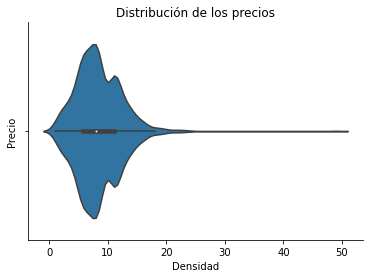

In [61]:
#Utilizo un violinplot para obtener uns repesentación de la densidad y distribución de los precios.
#Podría utilizar también un histplot
sns.violinplot(x='price', data=df)
plt.title("Distribución de los precios", fontsize = 12)
plt.xlabel("Densidad", fontsize = 10)
plt.ylabel("Precio", fontsize = 10)
plt.gca().spines['right'].set_visible(False) # quito la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quito la línea de arriba;

2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos?

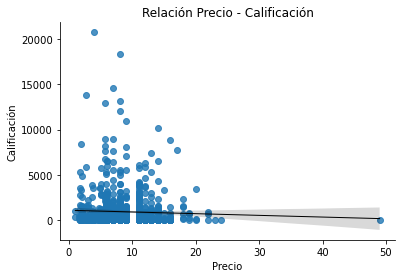

In [62]:
#Gráfico de regresión, porque muestra la relación entre las dos variables, además de la línea de regresión, que muestra la tendencia general de los datos.
sns.regplot( x='price', y='mean_product_ratings_count', data=df, line_kws={'color':'black', 'linewidth':1})
plt.title("Relación Precio - Calificación", fontsize = 12)
plt.xlabel("Precio", fontsize = 10)
plt.ylabel("Calificación", fontsize = 10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

In [63]:
#Veo los valores únicos que tiene la columna
df['badge_local_product'].unique()

array(['no', 'si'], dtype=object)

In [64]:
#Utilizo un pie para ver ese distribución porcentual
#Primero defino una variable que cuente la cantidad de 'si' y de 'no' que hay en la columna
badge=df['badge_local_product'].value_counts()
#Guardo las etiquetas en una variable, será 'si' y 'no'
labels_pie=badge.index
#Guardo los datos que formarán el pie, los valores de badge (cuántos si ycuántos no)
sizes=badge.values

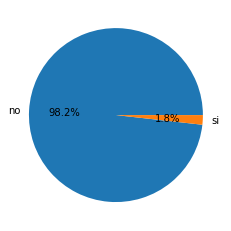

In [65]:
#Estas tres líneas son para obtener un fondo blanco
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')  # Fondo blanco para la figura
ax.set_facecolor('white')  # Fondo blanco para el eje

plt.pie(badge, labels=labels_pie, autopct= '%1.1f%%');

4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

In [66]:
#veo los valores únicos de la columna
df['badge_product_quality'].unique()

array(['buena', 'excelente'], dtype=object)

In [67]:
#Utilizo un pie para ver ese distribución porcentual
#Primero defino una variable que cuente la cantidad de 'buena' y de 'excelente' que hay en la columna
quality=df['badge_product_quality'].value_counts()
labels_quality=quality.index

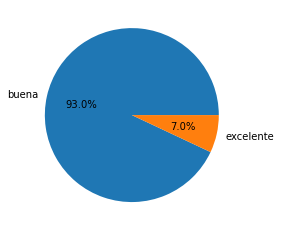

In [68]:
plt.pie(quality, labels=labels_quality, autopct='%1.1f%%');

5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?

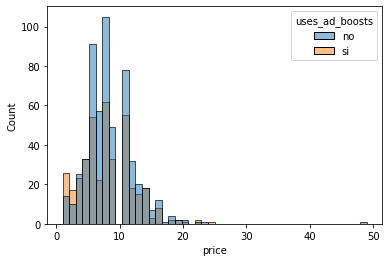

In [70]:
#Utilizo un histplot, con los precios en X, la cantidad en Y y la condición en hue
sns.histplot(x='price', hue='uses_ad_boosts', data=df);

6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas?

In [71]:
df['mean_units_sold_per_product'].value_counts()

100.0      254
1000.0     214
5000.0     100
10000.0     83
20000.0     44
          ... 
2175.0       1
21420.0      1
6673.0       1
4525.0       1
60000.0      1
Name: mean_units_sold_per_product, Length: 103, dtype: int64

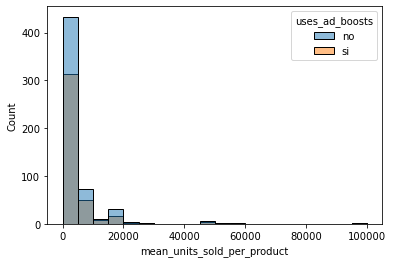

In [74]:
#Utilizo un histplot para ver la distribución en bins
sns.histplot(x='mean_units_sold_per_product', hue='uses_ad_boosts', data=df, bins=20);

7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_y`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que tienen 'excelente calidad del producto'? Haced que las dos gráficas tengan la misma escala en los dos ejes.

In [76]:
#Comrpuebo los valores únicos
df['badge_product_quality'].unique()

array(['buena', 'excelente'], dtype=object)

Text(0.5, 1.0, 'Distribución excelente')

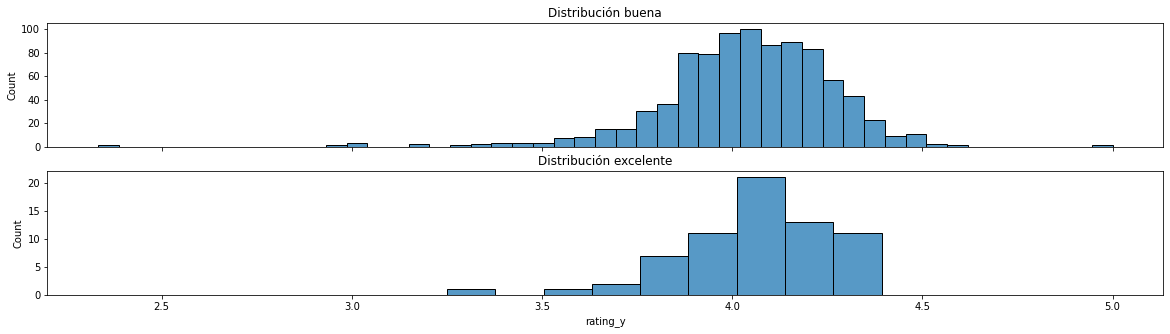

In [96]:
#Creo dos gráficos: uno para ver la distribución de 'buena' y otro para ver la distribución de 'excelente'. Hago dos variables, que serán el data de cada gráfico
good=df[df['badge_product_quality']=='buena']
excelent=df[df['badge_product_quality']=='excelente']

#Lienzo para dos gráficos
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(20,5), sharex=True)

#Gráfico para 'buena'
sns.histplot(x='rating_y', data=good, ax=axes[0])

#Gráfico para 'excelente'
sns.histplot(x='rating_y', data=excelent, ax=axes[1])

#Misma escala para ambos gráficos
#Encuentra los límites comunes, de los ejes X e Y
x_min=min(good['rating_y'].min(), excelent['rating_y'].min()) #guarda el mínimo de X de cada gráfico
x_max=max(good['rating_y'].max(), excelent['rating_y'].max()) #guarda el máximo de X de cada gráfico
y_max=max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]) #guarda el máximo de Y de cada gráfico
#Establezco los mismos límites en ambos subplots
for i in axes:
    ax.set_xlim(x_min, x_max) #set X entre el mínimo y máximo que sacó en x_min
    ax.set_ylim(0, y_max) #set Y entre el 0 y el máximo que sacó en y_min

#Añado títulos para mejor distinción
axes[0].set_title('Distribución buena')
axes[1].set_title('Distribución excelente')

8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

<AxesSubplot:xlabel='count', ylabel='origin_country'>

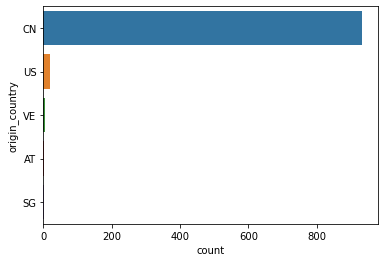

In [86]:
#Utilizo un countplot porque voy a contar categóricas
#Pongo en X el conteo para que devuelva barras horizontales
sns.countplot(y='origin_country', data=df)

9. ¿Cómo varía el precio promedio de los productos por país de origen?

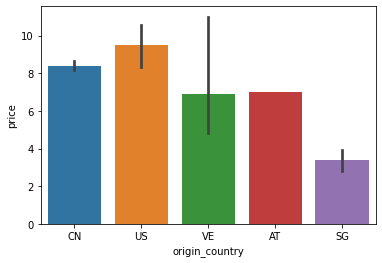

In [89]:
#Utilizo un barplot para poder comparar fácil y visualmente el precio medio según el país
#Primero calculo la media de precio por país
mean_country=df.groupby('origin_country')['price'].mean()
#Creo el gráfico
sns.barplot(x='origin_country', y='price', data=df);


10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

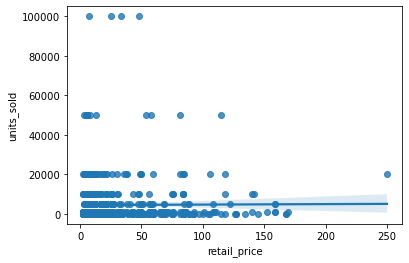

In [91]:
#Utilizo un regplot para ver la relación y cómo de dispersos están los datos
sns.regplot(x='retail_price', y='units_sold', data=df);

11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product").

In [92]:
#Veo los valores únicos que tiene la columna
df['badge_local_product'].unique()

array(['no', 'si'], dtype=object)

In [93]:
#Veo los valores únicos que tiene la columna
df['badge_product_quality'].unique()

array(['buena', 'excelente'], dtype=object)

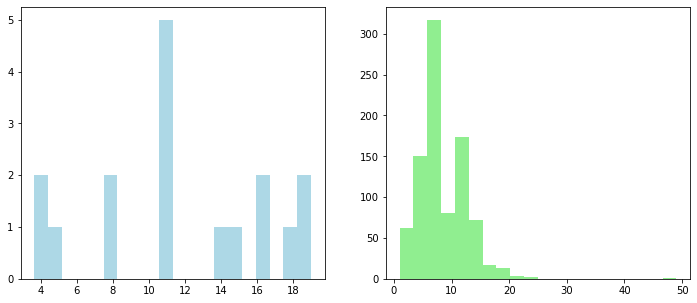

In [105]:
#Creo variable para guardar df filtrando donde 'badge_local_product' sea sí
df_badge=df[df['badge_local_product']=='si']
#Creo variable para guardar df filtrando donde 'badge_product_quality' sea buena
df_good_quality=df[df['badge_product_quality']=='buena']

#Creo los gráficos
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(df_badge['price'], bins=20, color='lightblue')
axes[1].hist(df_good_quality['price'], bins=20, color='lightgreen');